# 1.Description of the competition

The sinking of the Titanic is one of the most infamous shipwrecks in history, our object is to predict what groups of people are more likely to survive than others in this tragedy, it is a machine learning classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')

In [2]:
data1=train.copy(deep=True)
df=[data1,test]

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.The passengerId and Ticket has no impact on the prediction, thus, they will be excluded when analysing.

2.The Name variable is a nominal datatype, it could be used in feature engineering to see if it can make any contribution to the classificaiton.

3.The Sex and Embarked variables are a nominal datatype, they will be converted to numerical variables for mathematical calculations.

4.The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.

5.The cabin variable has more than half missing values, thus  it will be excluded from analysis.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## a.Data preprocessing

Data cleaning: Impute the missing values in ages, fare and embarked.

In [7]:
for dataset in df:
    dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)      

In [8]:
drop_column=['PassengerId','Cabin','Ticket']
data1.drop(drop_column,axis=1,inplace=True)

In [9]:
print(data1.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [10]:
drop_column2=['Cabin']
test.drop(drop_column2,axis=1,inplace=True)

In [11]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Feature engineering

Create columns: Family Size, IsAlone, Title, FareBin and AgeBin

In [12]:
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] +dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) 
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)    

In [13]:
data1['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Jonkheer          1
Capt              1
Lady              1
Ms                1
the Countess      1
Sir               1
Mme               1
Don               1
Name: Title, dtype: int64

In [14]:
#Cleanup rare Title names to one group
title_names=(data1['Title'].value_counts()<10)
data1['Title']=data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
data1['Title'].value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [15]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB


Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for dataset in df:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [18]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [19]:
drop_column=['Name','Sex','Age','Embarked','Title',"AgeBin",'FareBin']
data1.drop(drop_column,axis=1,inplace=True)

## b.Feature selection

<function matplotlib.pyplot.show(*args, **kw)>

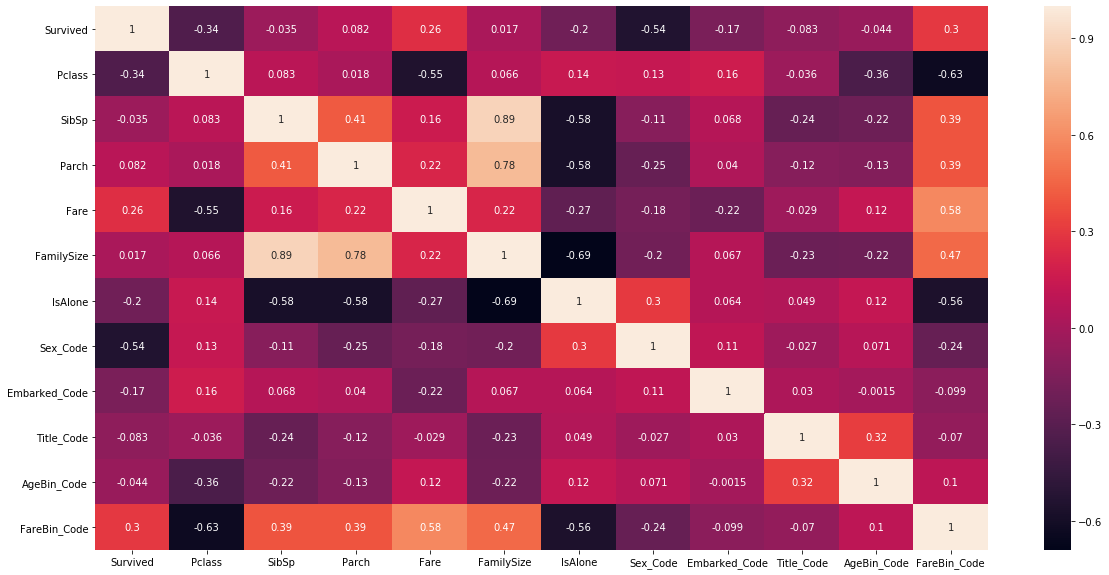

In [20]:
import seaborn as sns
correlation_matrix=data1.corr()
fig,ax = plt.subplots(figsize=(20,10))   #change the size of the heatmap
sns.heatmap(correlation_matrix,annot=True)
plt.show

[0.69590787 0.0468689  0.00802891 0.00187766 0.01321162 0.01296859
 0.01153158 0.12945197 0.01076624 0.05434222 0.00469332 0.01035112]


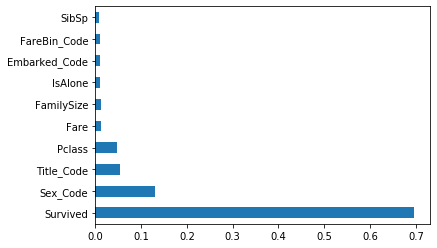

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
train_y=data1['Survived']
train_x=data1.iloc[:,0:20]
model.fit(train_x,train_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

We'll use the variabls: Pclass,FareBin_Code, Sex_Code,AgeBin_Code, FamilySize, Embarked_Code,Title_Code, IsAlone for prediction.

Split training and testing data

In [25]:
train_y=data1['Survived']
train_x=data1[['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'IsAlone','AgeBin_Code', 'FamilySize','FareBin_Code']]
from sklearn import model_selection
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train_x, train_y,test_size=.3, random_state = 0)

# 2.Implementing Algorithms

I'll use different classifcation models for implemention, and find the best model with the highest accuracy.

In [26]:
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(train1_x,train1_y)
prediction=model1.predict(test1_x)

In [27]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(test1_y, prediction) * 100
print('KNN accuracy', str(round(accuracy1, 2)) ,' %')

KNN accuracy 82.09  %


In [28]:
model2 = LogisticRegression()
model2.fit(train1_x, train1_y)
y_pred = model2.predict(test1_x)
accuracy1 = accuracy_score(test1_y, y_pred) * 100
print('Logistic regression accuracy', str(round(accuracy1, 2)) ,' %')

Logistic regression accuracy 80.97  %


In [29]:
model3 = SVC(gamma='auto')
model3.fit(train1_x, train1_y)
prediction = model3.predict(test1_x)
accuracy = accuracy_score(test1_y, prediction) * 100
print('SVM accuracy', str(round(accuracy, 2)) ,' %')

SVM accuracy 82.09  %


In [30]:
from sklearn import tree
model4 = tree.DecisionTreeClassifier()
model4.fit(train1_x, train1_y)
prediction = model4.predict(test1_x)
accuracy = accuracy_score(test1_y, prediction) * 100
print('Desicion Tree accuracy',round(accuracy,2),'%')

Desicion Tree accuracy 81.34 %


In [31]:
model5 = RandomForestClassifier(n_estimators=100, max_depth=9,random_state=0)
model5.fit(train1_x, train1_y) 
prediction = model5.predict(test1_x)
accuracy = accuracy_score(test1_y, prediction) * 100
print('Random Forest accuracy',round(accuracy,2),'%')

Random Forest accuracy 82.46 %


In [32]:
model6= GaussianNB()
model6.fit(train1_x, train1_y)
prediction = model6.predict(test1_x)
accuracy = accuracy_score(test1_y, prediction) * 100
print('Naive Bayes',round(accuracy,2),'%')

Naive Bayes 79.1 %


In this case, the Random Forest has the best performance ,hence I'll use it to predict the test dataset.

In [33]:
test_x=test[['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'IsAlone',  'AgeBin_Code','FamilySize','FareBin_Code']]

In [34]:
prediction = model5.predict(test_x)

In [35]:
prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [36]:
test['Survived'] = prediction
submit = test[['PassengerId','Survived']]
submit.to_csv("Fangyi Yu submit.csv", index=False)